# 통계기반 시계열 분석 2
- 수업 내용: Time-series Regression, Binary Variable Model, Trigonometric Model, Growth Curve Model
- 실습 조교: 배진수(wlstn215@korea.ac.kr), 황순혁(shhwang1@korea.ac.kr), 김지현(jihyun_k@korea.ac.kr)

## 1. 시계열 데이터 읽고 관찰하기

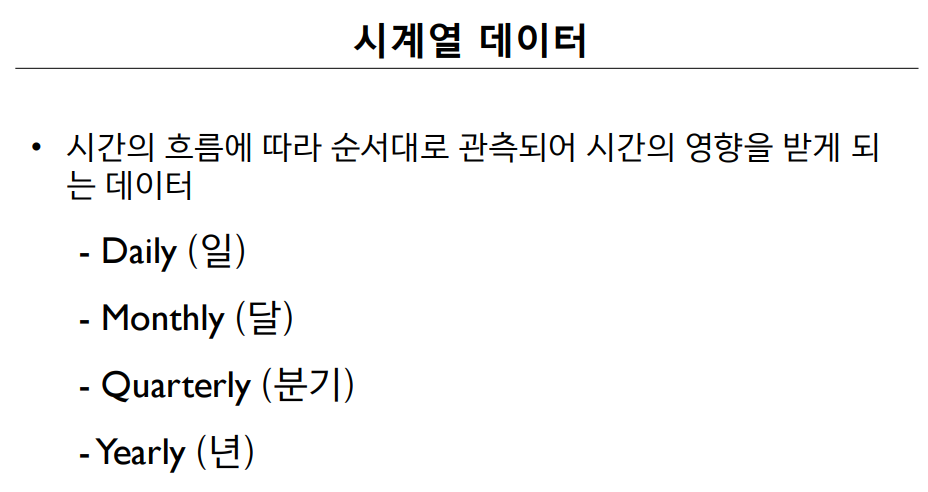

In [ ]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 아래 방법처럼 라이브러리 호출해도 상관 없음
# from matplotlib import pyplot
# import numpy
# import pandas

In [ ]:
# 코랩과 깃허브 연동하시는 분들 참고
# !git https://github.com/bogus215/LG-EDUCATION.git

# 이미지 안 보이시는 분들 참고 
# !pip install IPython ### 패키지 설치
# from IPython.display import Image
# Image('/content/LG-EDUCATION/image/1-1.PNG')

In [ ]:
# 현재 데이터 위치 파악하기
import os
print(os.getcwd())

In [ ]:
# 데이터 읽기
airline_data = pd.read_csv('./dataset/international-airline-passengers.csv')

# 코랩과 깃허브 연동하시는 분들
# airline_data = pd.read_csv('/content/LG-EDUCATION/dataset/international-airline-passengers.csv')

# 절대 경로와 상대경로 개념
"C:/Users/wlstn/OneDrive/바탕 화면/통계기반시계열분석-1회차-Local용/dataset/international-airline-passengers.csv"
'./dataset/international-airline-passengers.csv'

In [ ]:
# 데이터 확인하기
airline_data.head(5) ## 데이터 상단 5개만 일부 출력하여 데이터가 잘 읽어졌는지 확인 가능함.

In [ ]:
# 데이터 컬럼명 확인하기
airline_data.columns

In [ ]:
# 데이터 개수 및 컬럼 개수 확인하기
airline_data.shape # 데이터 행 개수 X 열 개수

In [ ]:
# 데이터 컬럼 리스트 인덱싱하기
print("첫번째 컬럼명:",airline_data.columns[0])
print("두번째 컬럼명:",airline_data.columns[1])

In [ ]:
# 데이터 컬럼명 수정하고, 수정된 내역 확인하기
airline_data.rename(columns={airline_data.columns[1]: 'passengers'}, inplace=True) # inplace = 변경된 데이터를 바로 저장
## airline_data = airline_data.rename(columns={airline_data.columns[1]: 'passengers'})
airline_data.columns[1]

In [ ]:
# 데이터 결측 여부를 확인. isnull()? Is it Null? 
airline_data.isnull() # True --> 데이터가 결측됨. False --> 데이터가 결측되지 않음

In [ ]:
# 각 컬럼별 데이터의 결측 개수를 확인함
airline_data.isnull().sum(axis=0)

In [ ]:
# 인덱스(데이터 포인트 1개)마다 결측 데이터 개수를 확인함
airline_data.isnull().sum(axis=1)

In [ ]:
# 데이터의 하단 5개를 출력함
airline_data.tail(5)

In [ ]:
# 결측 데이터를 제거하는 코드 ==> pandas.DataFrame.dropna() ; dropping na!
airline_data.dropna(inplace=True)

# 결측치 제거 후에도 결측치가 남아있는지 확인
airline_data.isnull().sum()

In [ ]:
# 데이터의 하단 5개를 출력함
airline_data.tail(5)

In [ ]:
# 데이터 포인트(인덱스)를 Month 변수로 설정함
airline_data.set_index('Month', inplace=True)

# 연-월-별로 구성된 문자형 데이터를 날짜형 데이터로 변경함 (편의용)
airline_data.index=pd.to_datetime(airline_data.index)
airline_data

In [ ]:
# 데이터 인덱스가 년-월-별로 구성되어 있는 것을 확인할 수 있음
airline_data.index

In [ ]:
# 그림 그리기 확인
fig = plt.figure(figsize=(12,8)) # 그림 가로 세로 길이를 조절할 수 있음
plt.plot(airline_data['passengers']) # 어떤 요소를 그릴 것인지?
plt.title('International airline passengers', fontsize=12) # 그림 제목 명명
plt.xlabel('Month', fontsize=12) # 그림 내 X-axis 제목 명명
plt.ylabel('Passengers', fontsize=12) # 그림 내 Y-axis 제목 명명

# 그려진 그림 출력
plt.show()

# 그려진 그림 저장 (os.getcwd() 위치에 저장됨)
plt.savefig("International airline passengers.png")

## 2. 시계열 데이터 분해해보기
- 시계열 데이터 구성요소: 추세변동(Trend), 순환변동(Cycle), 계절변동(Seasonal variations), 우연변동(Random fluctuation)

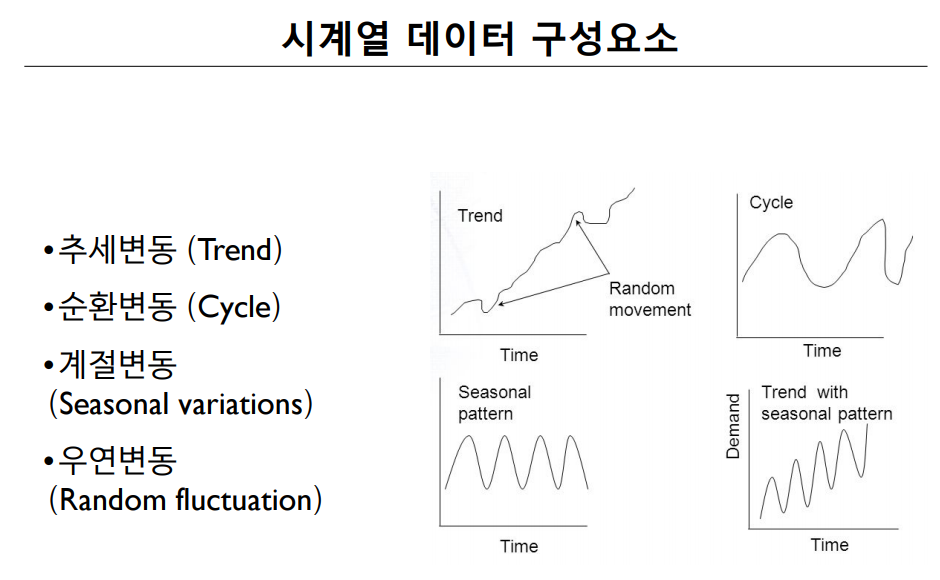

In [ ]:
# 이미지 안 보이시는 분들 참고 
# from IPython.display import Image
# Image('/content/LG-EDUCATION/image/1-2.PNG')

In [ ]:
# 라이브러리 import
from statsmodels.tsa.seasonal import seasonal_decompose

# 라이브러리 다운로드 방법
## !pip install statsmodels

In [ ]:
# 시계열 원본 데이터 = 추세성*계절성*랜덤성 (multiplicable)
# 계절성은 12 step으로 존재한다고 가정함
multiple_results = seasonal_decompose(airline_data['passengers'], model='multiplicable', period=12)

In [ ]:
# 시계열 데이터 분해 후, 분해된 그림 확인하기

plt.rcParams['figure.figsize']=[12,8] # 그림의 가로 및 세로 크기 설정 옵션
multiple_results.plot() # 그림 그리기
plt.show() # 그림 출력하기
plt.savefig('decomposed plot.png')

In [ ]:
# 트렌드 그림만 확인하기
multiple_results.trend.plot()

In [ ]:
# 계절성 그림만 확인하기
multiple_results.seasonal.plot()

In [ ]:
# 잔차 그림만 확인하기
multiple_results.resid.plot()

In [ ]:
# 시계열 원본 데이터 = 추세성+계절성+랜덤성 (additive)
# 계절성은 12 step으로 존재한다고 가정함
addict_results = seasonal_decompose(airline_data['passengers'], model='additive', period=12)

In [ ]:
# 분해된 시계열 그림 확인하기
plt.rcParams['figure.figsize']=[12,8] # 그림 가로 세로 크기 조정
addict_results.plot()
plt.show()

## 3. 평가용 지표 (연속형 수치)

In [ ]:
# sklearn 패키지 내부의 metrics 서브 패키지의 mean_absolute_error, mean_squared_error 함수 호출
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

## 아래와 같이 축약형으로도 호출 가능함
## from sklearn.metrics import mean_absolute_error as mae
## from sklearn.metrics import mean_squared_error as mse
## from sklearn.metrics import mean_absolute_percentage_error as mape

In [ ]:
# 데이터 읽기
example_data = pd.read_csv('./dataset/example-mad-mae.csv', index_col=0) # 데이터 읽을 시, 1번째 컬럼을 데이터 인덱스로 지정

# 코랩과 깃허브 연동하시는 분들
## example_data = pd.read_csv('/content/LG-EDUCATION/dataset/example-mad-mae.csv', index_col=0) # 데이터 읽을 시, 1번째 컬럼을 데이터 인덱스로 지정

In [ ]:
# 데이터 상단 5개 출력하여 잘 읽혔는지 확인
example_data.head(5)

In [ ]:
# 데이터 컬럼명 확인하기
example_data.columns

In [ ]:
# 함수 직접 만들어보기
def MAPE(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) *100

def MAD(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def MSE(y_true, y_pred):
    return np.mean(np.square(y_true - y_pred))

#### MAD; 직접 만든 함수와 패키지 함수로 결과물 비교해보기

In [ ]:
# MAD(MAE)
mad1 = MAD(example_data['actual_y'], example_data['pred_y'])
print(f'MAD by coding = {mad1:.2f}') # 소숫점(float)을 두번째 자리까지 출력
mad2 = mean_absolute_error(example_data['actual_y'], example_data['pred_y'])
print(f'MAD in package = {mad2:.2f}') # 소숫점(float)을 두번째 자리까지 출력

#### MSE; 직접 만든 함수와 패키지 함수로 결과물 비교해보기

In [ ]:
# calculate a MSE
mse1 = MSE(example_data['actual_y'], example_data['pred_y'])
print(f'MSE by coding = {mse1:.2f}')
mse2 = mean_squared_error(example_data['actual_y'], example_data['pred_y'])
print(f'MSE in package = {mse2:.2f}')

#### MAPE; 직접 만든 함수와 패키지 함수로 결과물 비교해보기

In [ ]:
# calculate a MAPE
mape1 = MAPE(example_data['actual_y'], example_data['pred_y'])
print(f'MAPE by coding = {mape1:.2f}')

mape2 = mean_absolute_percentage_error(example_data['actual_y'], example_data['pred_y'])*100
print(f'MAPE in package = {mape2:.2f}')

# sklearn 패키지의 mape 함수의 경우 100을 곱하지 않고 출력해주는 것을 알 수 있음

## 4. 모델링(No-trend, linear-trend, quadratic-trend model)

#### 1. no-trend model

In [ ]:
# 데이터 읽기
no_trend_data = pd.read_csv('./dataset/no-trend-data.csv')

# 코랩과 깃허브 연동하시는 분들
## no_trend_data = pd.read_csv('/content/LG-EDUCATION/dataset/no-trend-data.csv')

In [ ]:
# 총 24개월간의 월간 데이터가 수집되어 있는 것을 확인할 수 있음
no_trend_data

In [ ]:
# No-trend model; 평균값 예측
pred_no_trend = (np.mean(no_trend_data['year1']) + np.mean(no_trend_data['year2']))/2
print(pred_no_trend)

In [ ]:
# pandas.concat([], axis= 0 or 1); 데이터 병합을 수행할 때 사용하는 함수
# axis=0 --> 행 별로 병합, axis=1 --> 컬럼 별로 병합

x = pd.concat([no_trend_data['Month'], no_trend_data['Month']+12], axis=0)
y1 = pd.concat([no_trend_data['year1'], no_trend_data['year2']], axis=0)

y2 = np.full(24, [pred_no_trend]) # pred_no_trend 값을 24개만큼 복사

In [ ]:
# 예측값과 실제값을 시각화하여 얼마만큼 잘 예측하고 있는지를 정성적으로 평가

fig = plt.figure(figsize=(12,8))

plt.scatter(x, y1, color='b') # 산점도 그리기
plt.plot(x, y1, color='b') # 그래프 그리기
plt.plot(x, y2, color='r') # 그래프 그리기
plt.title('Prediction of "No-trend model"', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.ylabel('tons', fontsize=12)
plt.rc('xtick', labelsize=10) # x 축 눈금선을 tick이라 부르며, tick 글씨 크기를 조절
plt.rc('ytick', labelsize=10)
plt.show()

#### 2. Linear-trend model

In [ ]:
# 데이터 읽기
linear_data = pd.read_csv('./dataset/linear-trend-data.csv')

# 코랩과 깃허브 연동하시는 분들
## linear_data = pd.read_csv('/content/LG-EDUCATION/dataset/linear-trend-data.csv')

In [ ]:
linear_data # 24개월간의 판매 기록량 데이터

In [ ]:
# ols = ordinary least square = 선형 회귀 모델 호출
from statsmodels.formula.api import ols

# matplotlib와 비슷한 종류의 시각화 패키지인 seaborn 호출
import seaborn as sns

In [ ]:
# lienar-trend model, ols(종속변수 ~ 독립변수)
linear_model = ols('Sales ~ Time', data=linear_data).fit()

In [ ]:
# linear-trend model 선형 회귀 모델의 beta 값 출력하기
linear_model.params

In [ ]:
# 선형 회귀 모델의 결과 summary.
linear_model.summary()

In [ ]:
# 학습이 완료된 모델에 Time 데이터를 입력하여 예측하기
pred_linear = linear_model.predict(linear_data['Time']) ## Y\hat = beta_0 + beta_1*Time
pred_linear

In [ ]:
# 25월 달의 판매량을 예측 모델을 통해 예측
new_time = pd.DataFrame([25], columns=['Time']) # Time 값이 25를 갖는 데이터 생성
pred_new_time = linear_model.predict(new_time)
print(f'predition value when Time = 25 : {pred_new_time[0]:.2f}')

In [ ]:
plt.rcParams['figure.figsize'] = (12,8)

# seaborn 패키지 내에서 기본적으로 선형회귀 모델을 자동으로 수행 후 시각화.
sns.regplot(x='Time', y='Sales', data=linear_data)
plt.show()

In [ ]:
# seaborn 패키지가 아닌, 직접 학습해보았었던 예측 모델의 결과 시각화해보기
fig = plt.figure(figsize=(12,8))
plt.scatter(linear_data['Time'], linear_data['Sales'], color='g')
plt.plot(linear_data['Time'], pred_linear, color='orange')
plt.title('Prediction of "Linear-trend model"', fontsize=12)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.show()

#### 3. Quadratic-trend model

In [ ]:
quadratic_data = pd.read_csv('./dataset/quadratic-trend-data.csv')
quadratic_data

# 코랩과 깃허브 연동하시는 분들
## quadratic_data = pd.read_csv('/content/LG-EDUCATION/dataset/quadratic-trend-data.csv')

In [ ]:
# 읽었던 데이터의 컬럼명 확인하기
quadratic_data.columns

In [ ]:
# quadratic-trend 모델 학습하기, 종속변수 ~ 독립변수 1 + 독립변수 2 --> beta_0 + beta_1*Time + beta_2*Time^2
quadratic_model = ols('Loan_request ~ Time+Time_squared', data=quadratic_data).fit()

In [ ]:
# 학습 결과 Summary
quadratic_model.summary()

In [ ]:
# .predict 함수 이용하여 예측 결과 Y^hat 확인해보기
pred_quadra = quadratic_model.predict(quadratic_data[['Time', 'Time_squared']])
pred_quadra

In [ ]:
# Quadratic-trend model 예측 결과 시각화해보고 잘 예측되었는지 확인하기
fig = plt.figure(figsize=(12,8))

plt.scatter(quadratic_data['Time'], quadratic_data['Loan_request'], color='royalblue') # 실제 정답: quadratic_data['Loan_request']
plt.plot(quadratic_data['Time'], pred_quadra, color='red') # pred_quadra: 모델을 통해 예측한 값
plt.title('Prediction of "Quadratic-trend model"', fontsize=12)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.show()

In [ ]:
# 선형회귀 모델과 제곱선형회귀 모델의 예측 결과 비교해보기

linear_model_Loan = ols('Loan_request ~ Time', data=quadratic_data).fit()
pred_linear_Loan = linear_model_Loan.predict(quadratic_data['Time'])

fig = plt.figure(figsize=(12,8))
plt.scatter(quadratic_data['Time'], quadratic_data['Loan_request'], color='royalblue')
plt.plot(quadratic_data['Time'], pred_quadra, color='red')
plt.plot(quadratic_data['Time'], pred_linear_Loan, color='green')
plt.title('Prediction of "Quadratic-trend model"', fontsize=12)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.show()